# Hyperparameters

**Libraries**

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams.update({'figure.figsize': (10, 10), 'figure.dpi': 50, 'font.size': 10})
plt.style.use('fivethirtyeight')
#plt.rcParams['font.size'] = 10
clock_0 =time.time()

In [2]:
print( "Pandas", pd.__version__)
print("Numpy", np.__version__)
#print(plt.__version__)
print("Seaborn",sns.__version__)

Pandas 1.3.5
Numpy 1.21.2
Seaborn 0.11.2


*    Constants and variables

In [3]:
clock_0 =time.time()
TEST_SIZE = 0.3
RANDOM_STATE = 42
modelado = [] # resultados

## Get data

In [4]:
#tarjeta = pd.read_csv("~/Trabajo_tfm/datos_csv/tarjeta_datos0.csv", index_col='Unnamed: 0') # iter 0
tarjeta = pd.read_csv("~/Trabajo_tfm/datos_csv/tarjeta_datos_2.csv", index_col='Unnamed: 0') # iter 0
tarjeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7076
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 7077 non-null   object 
 1   provincia             7077 non-null   object 
 2   v_muy_cortos          7077 non-null   float64
 3   v_cortos              7077 non-null   float64
 4   v_medios              7077 non-null   float64
 5   v_largos              7077 non-null   float64
 6   v_noche               7077 non-null   float64
 7   v_madrugada           7077 non-null   float64
 8   v_mañana              7077 non-null   float64
 9   v_mediodia            7077 non-null   float64
 10  v_sobremesa           7077 non-null   float64
 11  v_tarde               7077 non-null   float64
 12  v_km_muy_cortos       7077 non-null   float64
 13  v_km_cortos           7077 non-null   float64
 14  v_km_medios           7077 non-null   float64
 15  v_km_largos          

In [5]:
#data = pd.get_dummies(tarjeta)
X = tarjeta.drop(columns=['num_casos']).select_dtypes(exclude=['object'])
Y = tarjeta[['num_casos']]

In [6]:
features = X.columns.tolist()
labels = Y.num_casos

In [7]:
lista_variables = list(X.columns)
lista_variables

['v_muy_cortos',
 'v_cortos',
 'v_medios',
 'v_largos',
 'v_noche',
 'v_madrugada',
 'v_mañana',
 'v_mediodia',
 'v_sobremesa',
 'v_tarde',
 'v_km_muy_cortos',
 'v_km_cortos',
 'v_km_medios',
 'v_km_largos',
 'v_km_noche',
 'v_km_madrugada',
 'v_km_mañana',
 'v_km_mediodia',
 'v_km_sobremesa',
 'v_km_tarde',
 'vext_muy_cortos',
 'vext_cortos',
 'vext_medios',
 'vext_largos',
 'vext_muy_largos',
 'vext_extra_largos',
 'vext_noche',
 'vext_madrugada',
 'vext_mañana',
 'vext_mediodia',
 'vext_sobremesa',
 'vext_tarde',
 'vext_km_muy_cortos',
 'vext_km_cortos',
 'vext_km_medios',
 'vext_km_largos',
 'vext_km_muy_largos',
 'vext_km_extra_largos',
 'vext_km_noche',
 'vext_km_madrugada',
 'vext_km_mañana',
 'vext_km_mediodia',
 'vext_km_sobremesa',
 'vext_km_tarde',
 'cero_viajes',
 'un_viaje',
 'dos_viajes',
 'mas_de_dos_viajes',
 'altitud',
 'velmedia',
 'tmin',
 'tmed',
 'tmax',
 'presMin',
 'presMax',
 'sol',
 'prec',
 'hr',
 'poblacion']

## Normalización.

In [8]:
from sklearn import preprocessing # RobustScaler() # StandardScaler() MinMaxScaler
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)
X_norm = scaler.fit_transform(X)

In [9]:
X_norm

array([[ 0.35063176,  0.55292618, -0.13585345, ..., -0.30404185,
        -0.08115771,  0.48710119],
       [-0.47358706, -0.42280983, -0.26369486, ..., -0.30404185,
         0.06905887, -0.3451965 ],
       [-0.33906846, -0.4516808 , -0.10383793, ...,  0.42701237,
         0.14416716, -0.3767292 ],
       ...,
       [ 0.42827745,  0.06583962, -0.42502569, ..., -0.30404185,
        -0.38159086,  1.00202217],
       [-0.78667529, -0.85643185, -0.098973  , ..., -0.30404185,
         1.42100806, -0.74191994],
       [ 0.03321428,  0.01740263, -0.03689962, ..., -0.30404185,
         0.59481689, -0.16452323]])

## Base model

### Liberias ML

In [10]:
#from sklearn.metrics import make_scorer
#from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.inspection import permutation_importance

import xgboost as xgb
print(xgb.__version__)

1.1.1


In [2]:
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, TimeSeriesSplit, StratifiedKFold

from sklearn.feature_selection import mutual_info_regression, SelectKBest, SelectPercentile

from feature_engine.selection import SmartCorrelatedSelection, DropCorrelatedFeatures
from feature_engine.selection import RecursiveFeatureAddition, RecursiveFeatureElimination, SelectByShuffling

### Funciones auxiliares

In [12]:
def modelo(atributos, labels, feat_eng="base",features = False, graficas= False):
    """ Function to test data (atributos and labels) with four models .
        Optionally (graficas) can show feature's importance an permutation importance.
    """
    num_feats = atributos.shape[1]
    
    X_train, X_test, y_train, y_test = train_test_split(
        atributos, labels, test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    reg1 = RandomForestRegressor(random_state=RANDOM_STATE)
    reg2 = xgb.XGBRegressor(random_state = RANDOM_STATE)
    reg3 = GradientBoostingRegressor(random_state = RANDOM_STATE)
    #####################################################################
    # 
    #####################################################################
    reg4 = AdaBoostRegressor(      
        RandomForestRegressor(random_state=RANDOM_STATE))
        #xgb.XGBRegressor(random_state = RANDOM_STATE), random_state = RANDOM_STATE)

    reg1.fit(X_train, y_train)
    reg2.fit(X_train, y_train)
    reg3.fit(X_train, y_train)
    reg4.fit(X_train, y_train)
    
    pred1 = reg1.predict(X_test)
    pred2 = reg2.predict(X_test)
    pred3 = reg3.predict(X_test)
    pred4 = reg4.predict(X_test)
    
    mae1 = mean_absolute_error(y_test, pred1)
    mae2 = mean_absolute_error(y_test, pred2)
    mae3 = mean_absolute_error(y_test, pred3)
    mae4 = mean_absolute_error(y_test, pred4)
    
    media_casos_reales = np.mean(y_test)
    mape1 = mae1/media_casos_reales*100
    mape2 = mae2/media_casos_reales*100
    mape3 = mae3/media_casos_reales*100
    mape4 = mae4/media_casos_reales*100

    mse1 = np.sqrt(mean_squared_error(y_test, pred1))
    mse2 = np.sqrt(mean_squared_error(y_test, pred2))
    mse3 = np.sqrt(mean_squared_error(y_test, pred3))
    mse4 = np.sqrt(mean_squared_error(y_test, pred4))

    r2_score1 = r2_score(y_test, pred1)
    r2_score2 = r2_score(y_test, pred2)
    r2_score3 = r2_score(y_test, pred3)
    r2_score4 = r2_score(y_test, pred4)

    r2_train_1 = reg1.score(X_train, y_train)
    r2_train_2 = reg2.score(X_train, y_train)
    r2_train_3 = reg3.score(X_train, y_train)
    r2_train_4 = reg4.score(X_train, y_train)
    
    modelado.append([feat_eng, 'RandomForest', #reg1.get_params(),
                     num_feats,  r2_score1, mse1, mae1,mape1])
    modelado.append([feat_eng, 'Xgboost',  #reg2.get_params(),
                     num_feats, r2_score2, mse2, mae2, mape2])
    modelado.append([feat_eng, 'GradBoost', #reg3.get_params(), 
                     num_feats, r2_score3, mse3, mae3, mape3])
    modelado.append([feat_eng,'Adaboost',  #reg4.get_params(), 
                     num_feats,  r2_score4, mse4, mae4, mape4])

    columnas = ['mae', 'mape', 'rmse', 'r2',  'train_r2']
    metricas_modelos = pd.DataFrame(
        {'metricas': columnas,
         'RandomForest': [mae1, mape1, mse1, r2_score1,  r2_train_1],
         'Xgboost': [mae2, mape2, mse2, r2_score2, r2_train_2],
         'GradBoost': [mae3, mape3,  mse3, r2_score3,  r2_train_3],
         'Adaboost': [mae4, mape4, mse4, r2_score4,  r2_train_4]})
 
    if graficas :
        
        importancias = pd.DataFrame(
            {
             'Attributes': features ,
             'RandomForest': reg1.feature_importances_,
             'Xgboost' : reg2.feature_importances_,
             'GradBoost': reg3.feature_importances_,
             'Adaboost' : reg4.feature_importances_ })
        
        result1 = permutation_importance(reg1, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)
        result2 = permutation_importance(reg2, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)
        result3 = permutation_importance(reg3, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)
        result4 = permutation_importance(reg4, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)

        permutaciones = [result1, result2, result3, result4]
        graficas_importancia(importancias, permutaciones, [pred1, pred2, pred3, pred4])
        
    return metricas_modelos

In [13]:
metricas = modelo(X_norm, labels)
metricas

,metricas,RandomForest,Xgboost,GradBoost,Adaboost
0,mae,100.180405,92.394258,136.540814,97.245913
1,mape,46.384266,42.779222,63.219403,45.025574
2,rmse,247.572729,210.998045,299.453239,212.267105
3,r2,0.823480,0.871783,0.741746,0.870236
4,train_r2,0.975035,0.997459,0.903407,0.997133


In [14]:
kfcv = KFold(n_splits = 5, shuffle = True, random_state=RANDOM_STATE) 
rkfcv = RepeatedKFold(n_splits = 5, n_repeats=2, random_state=RANDOM_STATE)
mae_scoring = { "mae" : make_scorer(mean_absolute_error)} #param_learning_rate

### XGBoost Selected features 

#### SelectKBest : select_kb_xgb

In [15]:
maes = []
for num_feats in range(X_norm.shape[1], 10,  -1):

    select = SelectKBest(score_func = mutual_info_regression, k = num_feats)
    X_best = select.fit_transform(X_norm, Y.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(X_best, Y.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)   

    reg = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    media_casos_reales = np.mean(y_test)
    mape = mae/media_casos_reales*100

    maes.append([num_feats, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])
best_num_feats = output.at[np.argmin(output.MAE),'num_feats']
print(output.at[np.argmin(output.MAE),'MAE'])
print(best_num_feats)

modelado.append(['SelectKBest', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 output.at[np.argmin(output.MAE),'num_feats'],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

select_kb_xgb = SelectKBest(score_func = mutual_info_regression, k = best_num_feats)

Xt_selK_xgb = select_kb_xgb.fit_transform(X_norm, Y.num_casos)

87.56657055051201
37


In [16]:
Xt_selK_xgb.shape

(7077, 37)

#### SelectPercentile : Xt_selP_xgb

In [17]:
maes = []
for percentiles in range(99, 84,  -1):

    selected_top_columns = SelectPercentile(mutual_info_regression, percentile=percentiles)

    X_best_perc = selected_top_columns.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_perc, Y.num_casos, test_size = TEST_SIZE,
                                                        random_state = RANDOM_STATE)                                
    
    reg = xgb.XGBRegressor( objective = 'reg:squarederror',random_state = RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test,pred)
    media_casos_reales = np.mean(y_test)
    mape = 100 * mae/np.mean(y_test)

    maes.append([percentiles, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])
print(output.at[np.argmin(output.MAE),'MAE'])
best_percentiles = output.at[np.argmin(output.MAE),'num_feats'] # percentil
print(best_percentiles)

selected_top_columns_xgb = SelectPercentile(mutual_info_regression, percentile = best_percentiles)

Xt_selP_xgb = selected_top_columns_xgb.fit_transform(X_norm, Y.num_casos)

modelado.append(['SelectPercentile', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 Xt_selP_xgb.shape[1], # output.at[np.argmin(output.MAE),'num_feats'],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])



88.93208530249176
89


In [18]:
Xt_selP_xgb.shape

(7077, 52)

#### SmartCorrelatedSelection : Xt_scs_xgb

In [19]:
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    tr_xgbsmart = SmartCorrelatedSelection(method='spearman', threshold=thresholds,
                                           scoring="neg_mean_absolute_error", selection_method="model_performance",
                                           estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

    X_tr_xgbsmart = tr_xgbsmart.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_tr_xgbsmart, Y.num_casos,
                                                        test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    reg = xgb.XGBRegressor(random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test,pred)
    media_casos_reales = np.mean(y_test)
    mape = mae/media_casos_reales*100

    maes.append([thresholds, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])

print(output.at[np.argmin(output.MAE),'MAE'])
best_threshold = output.at[np.argmin(output.MAE),'num_feats']# thresholds
print(best_threshold)    

tr_xgbsmart = SmartCorrelatedSelection(method='spearman',
                                       threshold=best_threshold,
                                       scoring="neg_mean_absolute_error",
                                       selection_method="model_performance",
                                       estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

Xt_scs_xgb = tr_xgbsmart.fit_transform(X_norm, Y.num_casos)

modelado.append(['SmartCorrelatedSelection', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 Xt_scs_xgb.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

92.9861265574275
0.9792307692307692


#### DropCorrelatedFeatures : Xt_dcf_xgb

In [20]:
start = time.time()
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    trh_dcf = DropCorrelatedFeatures(variables=None, method='spearman', threshold=thresholds)
    X_best_dcf = trh_dcf.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_dcf, Y.num_casos,
                                                        test_size = TEST_SIZE, random_state = RANDOM_STATE)                                
    
    reg = xgb.XGBRegressor( objective = 'reg:squarederror',random_state = RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test,pred)
    media_casos_reales = np.mean(y_test)
    mape = mae/media_casos_reales*100

    maes.append([thresholds, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])

print(output.at[np.argmin(output.MAE),'MAE'])
best_threshold = output.at[np.argmin(output.MAE),'num_feats']
print(best_threshold)    
print("DropCorrelatedFeatures took %.2f seconds for Xt_dcf_xgb  ." % ((time.time() - start)))

tr_dcf = DropCorrelatedFeatures(variables=None, method='spearman', threshold=best_threshold)

Xt_dcf_xgb = tr_dcf.fit_transform(X_norm, Y.num_casos)

modelado.append(['DropCorrelatedFeatures', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 Xt_dcf_xgb.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])
print ('Dim: ', Xt_dcf_xgb.shape[1],' | ', 'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ', 
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

90.67498882772952
0.9792307692307692
DropCorrelatedFeatures took 4.97 seconds for Xt_dcf_xgb  .
Dim:  44  |  r2:  0.8865364897914536  |  MSE:  198.48778320890776  |  MAE:  90.67498882772952


#### RecursiveFeatureAddition : Xt_rfa_xgb

In [21]:
start = time.time()

trrec_ad = RecursiveFeatureAddition(estimator=xgb.XGBRegressor(random_state=RANDOM_STATE),
                                    scoring ="neg_mean_absolute_error",
                                    cv=kfcv)

Xt_rfa_xgb = trrec_ad.fit_transform(X_norm, labels)

print("RecursiveFeatureAddition took %.2f seconds for Xt_trrec_ad  ." % ((time.time() - start)))

X_train, X_test, y_train, y_test = train_test_split(Xt_rfa_xgb, labels,
                                                    test_size = TEST_SIZE, random_state = RANDOM_STATE)

reg = xgb.XGBRegressor(random_state = RANDOM_STATE)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mape = mae / np.mean(y_test)*100
mse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
r2_train_ = reg.score(X_train, y_train)

print (Xt_rfa_xgb.shape[1], r2_score, mse, mae)

modelado.append(['RecursiveFeatureAddition', 'XGBRegressor',
                 #reg.get_params(),
                 Xt_rfa_xgb.shape[1],
                 r2, mse, mae, mape
                ])

print ( 'Dim: ', Xt_rfa_xgb.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',mse, ' | ', 'MAE: ',mae)

RecursiveFeatureAddition took 50.97 seconds for Xt_trrec_ad  .
14 <function r2_score at 0x7fe29b585310> 206.67049875262504 93.91274286932864
Dim:  14  |  r2:  0.8769885245946197  |  MSE:  206.67049875262504  |  MAE:  93.91274286932864


In [22]:
print("Dimension :", Xt_rfa_xgb.shape[1])
print("Cols :", Xt_rfa_xgb.columns)
lista_Xt_rfa_xgb = Xt_rfa_xgb.columns
[lista_variables[int(x)] for x in lista_Xt_rfa_xgb]

Dimension : 14
Cols : Index(['1', '5', '7', '10', '13', '15', '19', '21', '35', '37', '39', '42',
       '57', '58'],
      dtype='object')


['v_cortos',
 'v_madrugada',
 'v_mediodia',
 'v_km_muy_cortos',
 'v_km_largos',
 'v_km_madrugada',
 'v_km_tarde',
 'vext_cortos',
 'vext_km_largos',
 'vext_km_extra_largos',
 'vext_km_madrugada',
 'vext_km_sobremesa',
 'hr',
 'poblacion']

#### RecursiveFeatureElimination : Xt_rfe_xgb

In [23]:
start = time.time()

trrec = RecursiveFeatureElimination(estimator=xgb.XGBRegressor(random_state=RANDOM_STATE),
                                    scoring="neg_mean_absolute_error",
                                    cv=kfcv)

Xt_rfe_xgb = trrec.fit_transform(X_norm, labels)
print("RecursiveFeatureElimination took %.2f seconds for Xt_rfe_xgb  ." % ((time.time() - start)))

X_train, X_test, y_train, y_test = train_test_split(Xt_rfe_xgb, labels, test_size = TEST_SIZE, random_state = RANDOM_STATE)

reg = xgb.XGBRegressor(random_state = RANDOM_STATE)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mape = mae / np.mean(y_test)*100
mse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
r2_train_ = reg.score(X_train, y_train)

print ( 'Dim: ', Xt_rfe_xgb.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',mse, ' | ', 'MAE: ',mae)

modelado.append(['RecursiveFeatureElimination', 'XGBRegressor', #reg.get_params(),
                 Xt_rfe_xgb.shape[1], r2, mse, mae, mape
                ])

RecursiveFeatureElimination took 136.39 seconds for Xt_rfe_xgb  .
Dim:  49  |  r2:  0.8776518331828461  |  MSE:  206.11253610260866  |  MAE:  89.72486102921982


In [24]:
# print the selected features


### ADaBoost(XGboost) Selected features

#### SelectKBest : Xt_selK_ada

In [25]:
start = time.time()
maes = []
for num_feats in range(X_norm.shape[1], 10,  -1):

    select = SelectKBest(score_func = mutual_info_regression, k = num_feats)
    X_best = select.fit_transform(X_norm, Y.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(X_best, Y.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)   
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100

    maes.append([num_feats, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])
bestK_ada = output.at[np.argmin(output.MAE),'num_feats']

select_kb_ada = SelectKBest(score_func = mutual_info_regression, k = bestK_ada)
Xt_selK_ada = select_kb_ada.fit_transform(X_norm, Y.num_casos)

print("SelectKBest took %.2f seconds for Xt_selK_ada  ." % ((time.time() - start)))

print('MAE: ', output.at[np.argmin(output.MAE),'MAE'])
print ('Dim: ', Xt_selK_ada.shape[1],' | ',
       'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ', 
       'MSE: ', output.at[np.argmin(output.MAE),'rmse'], ' | ',
       'MAPE: ',output.at[np.argmin(output.MAE),'MAPE'])

modelado.append(['SelectKBest', 'AdaBoost(xgb)',  #Xt_selP_ada.get_params(),
                 bestK_ada, #Xt_selK_ada.shape[1], 
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

SelectKBest took 604.04 seconds for Xt_selK_ada  .
MAE:  87.50766893918231
Dim:  49  |  r2:  0.8811333700590501  |  MSE:  203.15880461321456  |  MAPE:  40.516695476048135


In [26]:
print("Dimension :", Xt_selK_ada.shape)


Dimension : (7077, 49)


#### SelectPercentile : Xt_selP_ada 

In [27]:
start = time.time()
maes = []
for percentiles in range(99, 84,  -1):

    selected_top_columns = SelectPercentile(mutual_info_regression, percentile=percentiles)

    X_best_perc = selected_top_columns.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_perc, Y.num_casos, test_size = TEST_SIZE,
                                                        random_state = RANDOM_STATE)                                
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
  
    maes.append([percentiles, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE','MAPE']) 
bestP_ada = output.at[np.argmin(output.MAE),'num_feats']
print(output.at[np.argmin(output.MAE),'MAE'])
print("SelectPercentile took %.2f seconds for Xt_selP_ada  ." % ((time.time() - start)))

selected_top_columns_ada = SelectPercentile(mutual_info_regression, percentile = bestP_ada)

Xt_selP_ada = selected_top_columns_ada.fit_transform(X_norm, Y.num_casos)
print ('Dim: ', Xt_selP_ada.shape[1],' | ',
       'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ',
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

modelado.append(['SelectPercentile', 'AdaBoost(xgbr)',  #Xt_selP_ada.get_params(), 
                 Xt_selP_ada.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

87.85074683790938
SelectPercentile took 234.40 seconds for Xt_selP_ada  .
Dim:  52  |  r2:  0.8705320300865214  |  MSE:  212.02488821807677  |  MAE:  87.85074683790938


#### SmartCorrelatedSelection : Xt_scs_ada

In [28]:
start = time.time()
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    tr_xgbsmart = SmartCorrelatedSelection(method='spearman', threshold=thresholds,
                                           scoring="neg_mean_absolute_error", selection_method="model_performance",
                                           estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

    X_tr_xgbsmart = tr_xgbsmart.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_tr_xgbsmart, Y.num_casos,
                                                        test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    
    maes.append([thresholds, r2, mse, mae, mape])


print("SmartCorrelatedSelection took %.2f seconds for Xt_scs_ada  ." % ((time.time() - start)))

output = pd.DataFrame(maes, columns=['num_feats','r2_score','rmse','MAE', 'MAPE'])
print(output.at[np.argmin(output.MAE),'MAE'])
print(output.at[np.argmin(output.MAE),'num_feats'])

best_thrsh_ada = output.at[np.argmin(output.MAE),'num_feats']

tr_xgbsmart = SmartCorrelatedSelection(method='spearman', 
                                       threshold=best_thrsh_ada,
                                       scoring="neg_mean_absolute_error",
                                       selection_method="model_performance",
                                       estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

Xt_scs_ada = tr_xgbsmart.fit_transform(X_norm, Y.num_casos)

print ('Dim: ', Xt_scs_ada.shape[1],' | ',
       'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ',
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

modelado.append(['SmartCorrelatedSelection', 'AdaBoost(xgbr)',#   Xt_scs_ada.get_params(), 
                 Xt_scs_ada.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

SmartCorrelatedSelection took 312.44 seconds for Xt_scs_ada  .
90.59628755160082
0.9576923076923076
Dim:  39  |  r2:  0.8587973051265899  |  MSE:  221.42526162411085  |  MAE:  90.59628755160082


#### DropCorrelatedFeatures : Xt_dcf_ada

In [29]:
start = time.time()
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    trh_dcf = DropCorrelatedFeatures(variables=None, method='spearman', threshold=thresholds)
    X_best_dcf = trh_dcf.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_dcf, Y.num_casos,
                                                        test_size = TEST_SIZE,
                                                        random_state = RANDOM_STATE)                                
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)

    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    
    maes.append([thresholds, r2, mse, mae, mape])

print("DropCorrelatedFeatures took %.2f seconds for Xt_dcf_ada  ." % ((time.time() - start)))

output = pd.DataFrame(maes, columns =  ['num_feats','r2_score','rmse','MAE', 'MAPE']) 
print(output.at[np.argmin(output.MAE),'MAE'])
print(output.at[np.argmin(output.MAE),'num_feats'])

best_dc_thrsh_ada = output.at[np.argmin(output.MAE),'num_feats']

tr_dcf = DropCorrelatedFeatures(variables=None, method='spearman', threshold = best_dc_thrsh_ada)
Xt_dcf_ada = tr_dcf.fit_transform(X_norm, Y.num_casos)

print ('Dim: ', Xt_dcf_ada.shape[1],' | ',
       'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ',
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

modelado.append(['DropCorrelatedFeatures', 'AdaBoost(xgbr)',  #Xt_dcf_ada.get_params(), 
                 Xt_dcf_ada.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

DropCorrelatedFeatures took 134.57 seconds for Xt_dcf_ada  .
88.80195658961259
0.99
Dim:  47  |  r2:  0.8781246252301882  |  MSE:  205.71390858067977  |  MAE:  88.80195658961259


#### RecursiveFeatureAddition : Xt_rfa_ada

In [30]:
start = time.time() # 1729.74 seconds

trrec_ada = RecursiveFeatureAddition(
    estimator = AdaBoostRegressor(
        xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE),
    scoring ="neg_mean_absolute_error", 
    cv = kfcv)

Xt_rfa_ada = trrec_ada.fit_transform(X_norm, Y.num_casos)

print("RecursiveFeatureAddition took %.2f seconds for Xt_rfa_ada  ." % ((time.time() - start)))

RecursiveFeatureAddition took 2810.85 seconds for Xt_rfa_ada  .


In [31]:
X_train, X_test, y_train, y_test = train_test_split(Xt_rfa_ada, labels,
                                                    test_size = TEST_SIZE, random_state = RANDOM_STATE)

ada_xgb_rfa = AdaBoostRegressor(
    xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)

ada_xgb_rfa.fit(X_train, y_train)
pred = ada_xgb_rfa.predict(X_test)

r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = np.sqrt(mean_squared_error(y_test, pred))
mape =100 *  mae / np.mean(y_test)

print (Xt_rfa_ada.shape[1], r2 , mse , mae, mape )

modelado.append(['RecursiveFeatureAddition', 'AdaBoost(xgbr)', 
                 #reg3.get_params(), 
                 Xt_rfa_ada.shape[1], r2, mse, mae, mape])

31 0.8699161876417603 212.52856112657398 88.17224719858046 40.82440010676743


In [32]:
print("Dimension :", Xt_rfa_ada.shape)
print("Cols :", Xt_rfa_ada.columns)
lista = Xt_rfa_ada.columns
[lista_variables[int(x)] for x in lista]

Dimension : (7077, 31)
Cols : Index(['4', '5', '6', '7', '8', '9', '10', '11', '14', '15', '16', '17', '18',
       '19', '21', '22', '24', '27', '28', '31', '33', '35', '36', '37', '38',
       '39', '41', '44', '51', '57', '58'],
      dtype='object')


['v_noche',
 'v_madrugada',
 'v_mañana',
 'v_mediodia',
 'v_sobremesa',
 'v_tarde',
 'v_km_muy_cortos',
 'v_km_cortos',
 'v_km_noche',
 'v_km_madrugada',
 'v_km_mañana',
 'v_km_mediodia',
 'v_km_sobremesa',
 'v_km_tarde',
 'vext_cortos',
 'vext_medios',
 'vext_muy_largos',
 'vext_madrugada',
 'vext_mañana',
 'vext_tarde',
 'vext_km_cortos',
 'vext_km_largos',
 'vext_km_muy_largos',
 'vext_km_extra_largos',
 'vext_km_noche',
 'vext_km_madrugada',
 'vext_km_mediodia',
 'cero_viajes',
 'tmed',
 'hr',
 'poblacion']


#### RecursiveFeatureElimination : Xt_rfe_ada

In [33]:
start = time.time()

trrfe = RecursiveFeatureElimination(
    estimator = AdaBoostRegressor(
        xgb.XGBRegressor(random_state=RANDOM_STATE),random_state=RANDOM_STATE),
    scoring = "neg_mean_absolute_error", 
    cv = kfcv)

Xt_rfe_ada = trrfe.fit_transform(X_norm, Y.num_casos)

print("RecursiveFeatureElimination took %.2f seconds for Xt_rfe_ada  ." % ((time.time() - start)))

RecursiveFeatureElimination took 5758.49 seconds for Xt_rfe_ada  .


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    Xt_rfe_ada, Y.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)

ada_xgb_rfe = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE),
                                random_state=RANDOM_STATE)

ada_xgb_rfe.fit(X_train, y_train)
pred = ada_xgb_rfe.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mape = mae / np.mean(y_test)*100
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
#r2_train_4 = ada_xgb_rfe.score(X_train, y_train)

print ( 'Dim: ', Xt_rfe_ada.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',rmse, ' | ', 'MAE: ',mae)

modelado.append(['RecursiveFeatureElimination', 'AdaBoost',   #reg4.get_params(),
                 Xt_rfe_ada.shape[1],  r2, mse, mae, mape])

Dim:  54  |  r2:  0.862536744306859  |  MSE:  218.4736108470657  |  MAE:  90.15458810075472


### Results

In [35]:
columnas = ['Metodo','Modelo', '#Feats', 'r2', 'MSE', 'MAE', 'MAPE']
Resultados_feat_eng = pd.DataFrame(modelado, columns=columnas)

In [36]:
Resultados_feat_eng  

,Metodo,Modelo,#Feats,r2,MSE,MAE,MAPE
0,base,RandomForest,59,0.823480,247.572729,100.180405,46.384266
1,base,Xgboost,59,0.871783,210.998045,92.394258,42.779222
2,base,GradBoost,59,0.741746,299.453239,136.540814,63.219403
3,base,Adaboost,59,0.870236,212.267105,97.245913,45.025574
4,SelectKBest,XGBRegressor,37,0.902515,183.981825,87.566571,40.543967
5,SelectPercentile,XGBRegressor,52,0.875676,207.770363,88.932085,41.176211
6,SmartCorrelatedSelection,XGBRegressor,44,0.870821,211.787801,92.986127,43.053262
7,DropCorrelatedFeatures,XGBRegressor,44,0.886536,198.487783,90.674989,41.983188
8,RecursiveFeatureAddition,XGBRegressor,14,0.876989,206.670499,93.912743,43.482292
9,RecursiveFeatureElimination,XGBRegressor,49,0.877652,206.112536,89.724861,41.543272


In [37]:
gmap = np.array([[1,2], [3,4],  [5,6], [7,8], [9,10],[11,12], [3,4],  [3,4], [1,2], [3,4]
                ,[1,2], [3,4],  [3,4], [1,2], [3,4]])
Resultados_feat_eng.head(15).style.background_gradient(
    axis=None, gmap=gmap, cmap='gist_rainbow',
    subset = ['#Feats','MAE' ])

,Metodo,Modelo,#Feats,r2,MSE,MAE,MAPE
0,base,RandomForest,59,0.823480,247.572729,100.180405,46.384266
1,base,Xgboost,59,0.871783,210.998045,92.394258,42.779222
2,base,GradBoost,59,0.741746,299.453239,136.540814,63.219403
3,base,Adaboost,59,0.870236,212.267105,97.245913,45.025574
4,SelectKBest,XGBRegressor,37,0.902515,183.981825,87.566571,40.543967
5,SelectPercentile,XGBRegressor,52,0.875676,207.770363,88.932085,41.176211
6,SmartCorrelatedSelection,XGBRegressor,44,0.870821,211.787801,92.986127,43.053262
7,DropCorrelatedFeatures,XGBRegressor,44,0.886536,198.487783,90.674989,41.983188
8,RecursiveFeatureAddition,XGBRegressor,14,0.876989,206.670499,93.912743,43.482292
9,RecursiveFeatureElimination,XGBRegressor,49,0.877652,206.112536,89.724861,41.543272


## GridSearch 

In [38]:
from sklearn.model_selection import GridSearchCV
import multiprocessing
mae_scoring = { "mae" : make_scorer(mean_absolute_error)} #param_learning_rate

In [39]:
def mejor_regresor (atributos, regresor, id_reg) :
    
    X_train, X_test, y_train, y_test = train_test_split(atributos, labels,
                                                        test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    regresor.fit(X_train, y_train)

    results = regresor.cv_results_
    print("best_score_ : ",regresor.best_score_)
    print("best_params_ : ",regresor.best_params_)
    # el mejor modelo
    mejor_modelo = regresor.best_estimator_

    # Entrenamiento del mejor modelo obtenido
    mejor_modelo.fit(X_train, y_train) 

    # nueva predicción 
    prediction = mejor_modelo.predict(X_test)

    #eftEntrenamiento = mejor_modelo.score(X_train, y_train)
    r2 = mejor_modelo.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    mae = mean_absolute_error(y_test, prediction) # np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    #r2 = r2_score(y_test, prediction)
    modelado.append([id_reg, id_reg, 
                     #mejor_modelo.get_params(),
                     atributos.shape[1],  r2, rmse, mae, mape])
    print("MAE : ",mae)
    print ( 'Dim: ', atributos.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',rmse, ' | ', 'MAE: ',mae)

    return mejor_modelo

In [40]:
param_grid =[{#"max_depth" :range(8,16,1), 
              "learning_rate": np.linspace(start=0.2, stop=0.5, num=20).tolist()
             }]

gxb = GridSearchCV(xgb.XGBRegressor(random_state=RANDOM_STATE ),
                   *param_grid,
                   cv=kfcv, 
                   scoring = mae_scoring, #'neg_mean_absolute_error',
                   verbose=1, refit = "mae", return_train_score=True, 
                   n_jobs=multiprocessing.cpu_count() // 2)

### XGBoost

#### SelectKBest

In [41]:
start = time.time() 
best_Grid_Xt_selK_xgb = mejor_regresor(Xt_selK_xgb, gxb, 'best_Grid_Xt_selK_xgb' )
print("best_Grid_Xt_selK_xgb took %.2f seconds for Xt_selK_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  108.91733066942575
best_params_ :  {'learning_rate': 0.5}
MAE :  93.9719493634676
Dim:  37  |  r2:  0.8773948361303301  |  MSE:  206.32889621764264  |  MAE:  93.9719493634676
best_Grid_Xt_selK_xgb took 20.56 seconds for Xt_selK_xgb  .


#### SelectPercentile - 

In [42]:
start = time.time() 
best_Grid_Xt_selP_xgb = mejor_regresor(Xt_selP_xgb, gxb, 'best_Grid_Xt_selP_xgb' )
print("best_Grid_Xt_selP_xgb took %.2f seconds for Xt_selP_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  106.75407188510289
best_params_ :  {'learning_rate': 0.46842105263157896}
MAE :  94.80953390645162
Dim:  52  |  r2:  0.8608954335970589  |  MSE:  219.77402763185333  |  MAE:  94.80953390645162
best_Grid_Xt_selP_xgb took 25.83 seconds for Xt_selP_xgb  .


#### SmartCorrelatedSelection - 

In [43]:
start = time.time() 
best_Grid_XGB_scs_kfcv = mejor_regresor(Xt_scs_xgb, gxb, 'best_Grid_Xt_scs_xgb' )
print("best_Grid_XGB_scs_kfcv took %.2f seconds for X_best_xcs_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  111.4704566798328
best_params_ :  {'learning_rate': 0.5}
MAE :  99.9234981192118
Dim:  44  |  r2:  0.8498576944007448  |  MSE:  228.3269703736047  |  MAE:  99.9234981192118
best_Grid_XGB_scs_kfcv took 20.65 seconds for X_best_xcs_xgb  .


#### DropCorrelatedFeatures - 

In [44]:
start = time.time() 
best_Grid_XGB_dcf_kfcv = mejor_regresor(Xt_dcf_xgb, gxb, 'best_Grid_Xt_dcf_xgb' )
print("best_Grid_XGB_dcf took %.2f seconds for X_best_dcf_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  109.80743353277967
best_params_ :  {'learning_rate': 0.4842105263157895}
MAE :  98.35073719127367
Dim:  44  |  r2:  0.8463531996468243  |  MSE:  230.97630744837159  |  MAE:  98.35073719127367
best_Grid_XGB_dcf took 21.08 seconds for X_best_dcf_xgb  .


#### RecursiveFeature addition - 

In [45]:
start = time.time() #  7.94 seconds
best_Grid_XGB_rfa_kfcv = mejor_regresor(Xt_rfa_xgb, gxb, 'best_Grid_Xt_rfa_xgb' )
print("best_Grid_XGB_rfa_kfcv took %.2f seconds for Xt_trrec_ad  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  107.39216251190317
best_params_ :  {'learning_rate': 0.5}
MAE :  97.4977454991692
Dim:  14  |  r2:  0.8719717199524386  |  MSE:  210.84272929041478  |  MAE:  97.4977454991692
best_Grid_XGB_rfa_kfcv took 8.60 seconds for Xt_trrec_ad  .


#### RecursiveFeatureElimination - 

In [46]:
start = time.time()  # 15.33 seconds
best_Grid_XGB_rfe_kfcv = mejor_regresor(Xt_rfe_xgb, gxb, 'best_Grid_Xt_rfe_xgb' )
print("best_Grid_XGB_kbest_kfcv took %.2f seconds for X_best_mi  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  108.35550104104918
best_params_ :  {'learning_rate': 0.5}
MAE :  95.40791401808657
Dim:  49  |  r2:  0.8641486179923976  |  MSE:  217.18893924606226  |  MAE:  95.40791401808657
best_Grid_XGB_kbest_kfcv took 23.85 seconds for X_best_mi  .


### AdaBoost(XGBoost)

In [47]:
param_grid_adab= [{
       # "n_estimators" : [50, 100],
        #"loss" : ['linear', 'square', 'exponential'],
        #"learning_rate": np.linspace(start=0.1, stop=7, num=10).tolist()
        "learning_rate": np.linspace(start=0.28, stop=0.5, num=10).tolist()
    }]

gax = GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE),
                   *param_grid_adab,
                   scoring = 'neg_mean_absolute_error',
                   verbose=1, refit="mae", return_train_score=True, cv=kfcv,
                   n_jobs=multiprocessing.cpu_count() // 2)

#### SelectKBest

In [48]:
start = time.time() # 298.53 seconds
best_Grid_Xt_selK_ada = mejor_regresor(Xt_selK_ada, gax, 'best_Grid_Xt_selK_ada' )
print("best_Grid_Xt_selK_ada took %.2f seconds for Xt_selK_ada  ." % ((time.time() - start)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -94.11437079133256
best_params_ :  {'learning_rate': 0.28}
MAE :  82.91682594750785
Dim:  49  |  r2:  0.9002807764792958  |  MSE:  186.07803785169938  |  MAE:  82.91682594750785
best_Grid_Xt_selK_ada took 540.53 seconds for Xt_selK_ada  .


#### SelectPercentile - 

In [49]:
start = time.time() # 384.69 seconds
best_Grid_Xt_selP_ada = mejor_regresor(Xt_selP_ada, gax, 'best_Grid_Xt_selP_ada' )
print("best_Grid_Xt_selP_ada took %.2f seconds for Xt_selP_ada  ." % ((time.time() - start)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -94.0549023211895
best_params_ :  {'learning_rate': 0.30444444444444446}
MAE :  84.37477744273883
Dim:  52  |  r2:  0.8901762361142697  |  MSE:  195.27823256994319  |  MAE:  84.37477744273883
best_Grid_Xt_selP_ada took 560.56 seconds for Xt_selP_ada  .


#### SmartCorrelateSelection - 

In [50]:
start = time.time()  # 278
best_grid_ada_scs = mejor_regresor(Xt_scs_ada, gax, 'best_Grid_Xt_scs_ada')
print(
    "GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for X_best_scs_sgb candidates parameter settings."
    % ((time.time() - start))
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -96.46468264775325
best_params_ :  {'learning_rate': 0.28}
MAE :  86.50521911061921
Dim:  39  |  r2:  0.8769779084991705  |  MSE:  206.67941656455656  |  MAE:  86.50521911061921
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 422.27 seconds for X_best_scs_sgb candidates parameter settings.


#### DropCorrelatedFeatures - 

In [51]:
start = time.time() # 235.59 seconds
best_grid_ada_dcf = mejor_regresor(Xt_dcf_ada, gax, 'best_Grid_Xt_dcf_ada')
print(
    "GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for X_best_dcf_xgb candidates parameter settings."
    % ((time.time() - start))
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -94.95908695877776
best_params_ :  {'learning_rate': 0.45111111111111113}
MAE :  86.50465241672292
Dim:  47  |  r2:  0.8825233500718733  |  MSE:  201.96748174075626  |  MAE:  86.50465241672292
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 505.70 seconds for X_best_dcf_xgb candidates parameter settings.


#### RecursiveFeatureElimination - 

In [52]:
start = time.time() # 336.71
best_grid_ada_rfe = mejor_regresor(Xt_rfe_ada, gax, 'best_Grid_Xt_rfe_ada')
print(
    "GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for rfe  candidates parameter settings."
    % ((time.time() - start))
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -94.81994578667496
best_params_ :  {'learning_rate': 0.37777777777777777}
MAE :  85.1184541289949
Dim:  54  |  r2:  0.8909316003677058  |  MSE:  194.60551519601646  |  MAE:  85.1184541289949
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 907.07 seconds for rfe  candidates parameter settings.


#### RecursiveFeatureAddition - 

In [53]:
start = time.time() # 180.20 
best_grid_ada_rfa = mejor_regresor(Xt_rfa_ada, gax, 'best_Grid_Xt_rfa_ada')
print("GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for RecursiveFeatureAddition candidates parameter settings."
    % ((time.time() - start)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -91.63685211391814
best_params_ :  {'learning_rate': 0.28}
MAE :  83.14081476969739
Dim:  31  |  r2:  0.901592254600674  |  MSE:  184.85036597607075  |  MAE:  83.14081476969739
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 371.15 seconds for RecursiveFeatureAddition candidates parameter settings.


In [54]:
metricas_grid = pd.DataFrame(modelado,
                                columns=['Método', 'Modelo',  "#Feats", 'ScoreTest', 'RMSE',  'MAE', 'MAPE'])
nombre = '_t_dat_1.csv'

metricas_grid.to_csv("~/Trabajo_tfm/datos_csv/metricas_grid" + nombre )
metricas_grid.shape

(28, 7)

In [55]:
metricas_grid

,Método,Modelo,#Feats,ScoreTest,RMSE,MAE,MAPE
0,base,RandomForest,59,0.823480,247.572729,100.180405,46.384266
1,base,Xgboost,59,0.871783,210.998045,92.394258,42.779222
2,base,GradBoost,59,0.741746,299.453239,136.540814,63.219403
3,base,Adaboost,59,0.870236,212.267105,97.245913,45.025574
4,SelectKBest,XGBRegressor,37,0.902515,183.981825,87.566571,40.543967
5,SelectPercentile,XGBRegressor,52,0.875676,207.770363,88.932085,41.176211
6,SmartCorrelatedSelection,XGBRegressor,44,0.870821,211.787801,92.986127,43.053262
7,DropCorrelatedFeatures,XGBRegressor,44,0.886536,198.487783,90.674989,41.983188
8,RecursiveFeatureAddition,XGBRegressor,14,0.876989,206.670499,93.912743,43.482292
9,RecursiveFeatureElimination,XGBRegressor,49,0.877652,206.112536,89.724861,41.543272


In [56]:
gmap = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [3, 4],
                 [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [3, 4], [1, 2],
                 [3, 4]])
metricas_grid.head(15).style.background_gradient(axis=None,
                                               gmap=gmap,
                                               cmap='gist_rainbow',
                                               subset=['#Feats', 'MAE'])

,Método,Modelo,#Feats,ScoreTest,RMSE,MAE,MAPE
0,base,RandomForest,59,0.823480,247.572729,100.180405,46.384266
1,base,Xgboost,59,0.871783,210.998045,92.394258,42.779222
2,base,GradBoost,59,0.741746,299.453239,136.540814,63.219403
3,base,Adaboost,59,0.870236,212.267105,97.245913,45.025574
4,SelectKBest,XGBRegressor,37,0.902515,183.981825,87.566571,40.543967
5,SelectPercentile,XGBRegressor,52,0.875676,207.770363,88.932085,41.176211
6,SmartCorrelatedSelection,XGBRegressor,44,0.870821,211.787801,92.986127,43.053262
7,DropCorrelatedFeatures,XGBRegressor,44,0.886536,198.487783,90.674989,41.983188
8,RecursiveFeatureAddition,XGBRegressor,14,0.876989,206.670499,93.912743,43.482292
9,RecursiveFeatureElimination,XGBRegressor,49,0.877652,206.112536,89.724861,41.543272


## Hiperparámetros XGBoost

In [57]:
# Print Df scores ;: imprime los resultados de de crossval para la metrica mae
def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_train_mae, std_train_mae, mean_test_mae, std_test_mae in zip(
        filtered_cv_results["train-mae-mean"],
        filtered_cv_results["train-mae-std"],
        #filtered_cv_results["mean_train_r2"],
        #filtered_cv_results["std_train_r2"],
        filtered_cv_results["test-mae-mean"],
        filtered_cv_results["test-mae-std"],
        #filtered_cv_results["params"],
    ):
        print(
            f"mae test: {mean_test_mae:0.3f} (±{std_test_mae:0.03f}),"
            f" mae train: {mean_train_mae:0.3f} (±{std_train_mae:0.03f}),"
            #f" for {params}"
        )
    print()

In [58]:
def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by mae and keep all models with one standard
    deviation of the best by mae. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_mae = 115

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print("*...*.."*10)

    #print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[cv_results_["test-mae-mean"] < precision_mae]
    
# 'train-mae-mean', 'train-mae-std', 'test-mae-mean', 'test-mae-mean'
    print(f"Models with a precision lower than {precision_mae}:")
    print("*...*.."*10)

    high_precision_cv_results = high_precision_cv_results[
        ['train-mae-mean', 'train-mae-std', 'test-mae-mean', 'test-mae-std']
    ]
    print_dataframe(high_precision_cv_results)

    # Select the most performant models in terms of mae
    # (within 1 sigma from the best)
    best_mae_std = high_precision_cv_results["test-mae-mean"].std()
    best_mae = high_precision_cv_results["test-mae-mean"].max() # max
    best_mae_threshold = best_mae - best_mae_std

    high_mae_cv_results = high_precision_cv_results[
        high_precision_cv_results["test-mae-mean"] < best_mae_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest mae model:"
    )
    print_dataframe(high_mae_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_mae_high_precision_index = high_mae_cv_results[
        "test-mae-mean"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and mae.\n"
        "Its scoring test-mae-mean is:\n\n"
        f"{high_mae_cv_results.loc[fastest_top_mae_high_precision_index]}"
    )

    return fastest_top_mae_high_precision_index

### Interfaz nativa

In [59]:
def xgb_helper(temp_dmatrix, PARAMETERS, V_PARAM_NAME=False, V_PARAM_VALUES=False, BR=50):
  
    if V_PARAM_VALUES == False:
        
        cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5, num_boost_round=BR,
                            params=PARAMETERS, as_pandas=True, seed=RANDOM_STATE)
        return cv_results

    else:
        results = []

        for v_param_value in V_PARAM_VALUES:
            
            PARAMETERS[V_PARAM_NAME] = v_param_value
            cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5, num_boost_round=BR,
                                params=PARAMETERS, as_pandas=True, seed=RANDOM_STATE)
            
            results.append(
                (
                    #cv_results["train-mae-mean"].tail().values[-1],
                    cv_results["test-mae-mean"].tail().values[-1]
                )
            )

        data = list(zip(V_PARAM_VALUES, results))
        #print(pd.DataFrame(data, columns=[V_PARAM_NAME, "mae"]))

        return cv_results, pd.DataFrame(data, columns=[V_PARAM_NAME, "mae"])

In [60]:
def params_helper(PARAMETERS, temp_dmatrix, name, values) :
    
    cv_data, results = xgb_helper(temp_dmatrix, PARAMETERS, V_PARAM_NAME= name, 
                                  V_PARAM_VALUES=values)
    ## Ver el menor mae.
    nombre = results.at[np.argmin(results.mae), name]
    print(name +" : ", nombre, results.at[np.argmin(results.mae),'mae'])
    return nombre


In [61]:
def xgb_params (metodo, atributos, etiquetas):
    
    X_train, X_test, y_train, y_test = train_test_split(atributos, etiquetas, 
                                                        test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    temp_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

    PARAMETERS = {"objective": 'reg:squarederror', "eval_metric": "mae", "random_state": RANDOM_STATE}
    
    
    #PARAMETERS ["learning_rate"] = params_helper(PARAMETERS, temp_dmatrix, "learning_rate",
    #                                             np.linspace(start=0.1, stop=0.4, num=15).tolist())
    
    
    
    PARAMETERS ["min_child_weight"] = params_helper(PARAMETERS, temp_dmatrix, "min_child_weight",
                                                     range(0,5,1))
    
    PARAMETERS ["subsample"] = params_helper(PARAMETERS, temp_dmatrix, "subsample",
                                         np.linspace(start=0.1, stop=.9, num=7).tolist())
    
    PARAMETERS ["colsample_bytree"] = params_helper(PARAMETERS, temp_dmatrix, "colsample_bytree",
                                                    np.linspace(start=0.2, stop=.9, num=6).tolist())
        
    PARAMETERS ["scale_pos_weight"] = params_helper(PARAMETERS, temp_dmatrix, "scale_pos_weight",
                                                    np.linspace(start=0.2, stop=2, num=20).tolist())
    
  
    PARAMETERS ["gamma"] = params_helper(PARAMETERS, temp_dmatrix, "gamma",
                                         np.linspace(start=0.1, stop=4, num=20).tolist()) 
    
    PARAMETERS ["reg_alpha"] = params_helper(PARAMETERS, temp_dmatrix, "reg_alpha",
                                             np.linspace(start=0.001, stop=1, num=20).tolist())
    
    PARAMETERS ["reg_lambda"] = params_helper(PARAMETERS, temp_dmatrix, "reg_lambda",
                                              np.linspace(start=0.001, stop=1, num=20).tolist())
    
    PARAMETERS ["max_depth"] = params_helper(PARAMETERS, temp_dmatrix, "max_depth", range(4, 16, 1))
    
    PARAMETERS ["learning_rate"] = params_helper(PARAMETERS, temp_dmatrix, "learning_rate",
                                                  np.linspace(start=0.1, stop=0.3, num=30).tolist())
    
    xgbr = xgb.XGBRegressor(**PARAMETERS)
    xgbr.fit(X_train,y_train)
    pred = xgbr.predict(X_test)
    
    eftEntrenamiento = xgbr.score (X_train, y_train)
    eftPrediccion = xgbr.score (X_test, y_test)  
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    
    modelado.append(['xgb_params', metodo,  #xgbr.get_params(),
                     atributos.shape[1], eftPrediccion, rmse, mae, mape])
    print("----"*10)
    print(atributos.shape[1], eftEntrenamiento, eftPrediccion , rmse, mae, mape )
    print("-  -"*10)
    return PARAMETERS

### XGBoost Results

In [62]:
start = time.time() 
params_Xt_selK_xgb= xgb_params('Xt_selK_xgb', Xt_selK_xgb, labels)
print("XGBRegressor took %.2f seconds for Xt_selK_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_selP_xgb = xgb_params('Xt_selP_xgb', Xt_selP_xgb, labels)
print("XGBRegressor took %.2f seconds for Xt_selP_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_scs_xgb = xgb_params('Xt_scs_xgb', Xt_scs_xgb, labels)
print("XGBRegressor took %.2f seconds for Xt_scs_xgb ." % (time.time() - start))
print("----"*10)

start = time.time()
params_Xt_dcf_xgb = xgb_params('Xt_dcf_xgb', Xt_dcf_xgb, labels)  
print("XGBRegressor took %.2f seconds for Xt_dcf_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_rfa_xgb = xgb_params('Xt_rfa_xgb', Xt_rfa_xgb, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfa_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_rfe_xgb = xgb_params('Xt_rfe_xgb', Xt_rfe_xgb, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfe_xgb  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  2 103.3971968
subsample :  0.9 108.02161559999999
colsample_bytree :  0.9 110.0225388
scale_pos_weight :  0.5789473684210527 107.1797334
gamma :  1.7421052631578948 107.1797302
reg_alpha :  0.001 107.1797378
reg_lambda :  1.0 107.17973459999999
max_depth :  12 100.55563659999999
learning_rate :  0.1206896551724138 96.204541
----------------------------------------
37 0.9997678065866956 0.8954797587897099 190.50477926763276 85.10433993418394 39.403936438986506
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 163.33 seconds for Xt_selK_xgb  .
----------------------------------------
min_child_weight :  0 104.08356160000001
subsample :  0.7666666666666666 106.01115399999999
colsample_bytree :  0.9 105.39168099999999
scale_pos_weight :  1.8105263157894738 104.48213200000001
gamma :  4.0 104.3614062
reg_alpha :  0.001 104.3614012
reg_lambda :  1.0 104.3613998
max_depth :  12 100.4597548
learning_rate :  0.1 93.60795579999998
------------------------------------

### AdaBoost(XGBoost) Results

In [63]:
start = time.time() 
params_Xt_selK_ada = xgb_params('Xt_selK_ada', Xt_selK_ada, labels)
print("XGBRegressor took %.2f seconds for Xt_selK_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  1 104.03485699999999
subsample :  0.7666666666666666 105.6827546
colsample_bytree :  0.9 106.52411959999999
scale_pos_weight :  1.7157894736842105 105.457602
gamma :  0.1 105.45760480000001
reg_alpha :  0.001 105.4575958
reg_lambda :  1.0 105.4575988
max_depth :  12 97.2878634
learning_rate :  0.1 94.2856552
----------------------------------------
49 0.9995675521940691 0.8951822673136157 190.7756994154827 81.35361431791621 37.667322843278114
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 124.37 seconds for Xt_selK_ada  .
----------------------------------------


In [64]:
start = time.time()
params_Xt_selP_ada = xgb_params('Xt_selP_ada', Xt_selP_ada, labels)
print("XGBRegressor took %.2f seconds for Xt_selP_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  1 104.083557
subsample :  0.7666666666666666 106.0111648
colsample_bytree :  0.9 105.3916824
scale_pos_weight :  1.8105263157894738 104.4821322
gamma :  3.5894736842105264 104.36140460000001
reg_alpha :  0.001 104.3614044
reg_lambda :  1.0 104.36140900000001
max_depth :  15 99.97298899999998
learning_rate :  0.1 92.97528700000001
----------------------------------------
52 0.9998961285105875 0.8691847792444009 213.12520448418255 85.18295584974035 39.44033618713182
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 143.20 seconds for Xt_selP_ada  .
----------------------------------------


In [65]:
start = time.time()
params_Xt_scs_ada = xgb_params('Xt_scs_ada', Xt_scs_ada, labels)
print("XGBRegressor took %.2f seconds for Xt_scs_ada ." % (time.time() - start))
print("----"*10)

min_child_weight :  2 105.6164964
subsample :  0.7666666666666666 109.76671719999999
colsample_bytree :  0.9 108.8977232
scale_pos_weight :  1.6210526315789473 107.06376500000002
gamma :  0.30526315789473685 107.06376340000001
reg_alpha :  0.3164736842105263 106.8824172
reg_lambda :  1.0 106.8824204
max_depth :  15 100.7404206
learning_rate :  0.1896551724137931 97.14571980000001
----------------------------------------
39 0.9999928581728634 0.8699438581129575 212.5059561687234 86.93962827813154 40.25368846465348
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 110.51 seconds for Xt_scs_ada .
----------------------------------------


In [66]:
start = time.time()
params_Xt_dcf_ada = xgb_params('Xt_dcf_ada', Xt_dcf_ada, labels)  
print("XGBRegressor took %.2f seconds for Xt_dcf_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  3 105.3630874
subsample :  0.7666666666666666 108.2828708
colsample_bytree :  0.9 108.599797
scale_pos_weight :  0.4842105263157895 108.1551514
gamma :  3.794736842105263 108.15514820000001
reg_alpha :  0.001 108.15514680000001
reg_lambda :  0.8422631578947368 107.48963919999998
max_depth :  12 103.01329500000001
learning_rate :  0.1482758620689655 97.1513076
----------------------------------------
47 0.9996709803948476 0.8586227582045999 221.56207615626948 91.11807264875894 42.188338995065614
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 122.28 seconds for Xt_dcf_ada  .
----------------------------------------


In [67]:
start = time.time()
params_Xt_rfa_ada = xgb_params('Xt_rfa_ada', Xt_rfa_ada, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfa_ada  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_rfe_ada = xgb_params('Xt_rfe_ada', Xt_rfe_ada, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfe_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  1 101.69474340000001
subsample :  0.7666666666666666 102.498303
colsample_bytree :  0.76 103.3933166
scale_pos_weight :  1.7157894736842105 102.6757278
gamma :  3.3842105263157896 102.16660300000001
reg_alpha :  0.001 102.166603
reg_lambda :  1.0 102.1666016
max_depth :  10 98.9003966
learning_rate :  0.1 95.1257798
----------------------------------------
31 0.998504120429278 0.8818357154449664 202.55771476918585 83.56264638585054 38.69012096689771
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 99.73 seconds for Xt_rfa_ada  .
----------------------------------------
min_child_weight :  2 104.7081788
subsample :  0.9 105.2477386
colsample_bytree :  0.9 107.0108004
scale_pos_weight :  0.4842105263157895 105.5308138
gamma :  2.5631578947368423 105.53080600000001
reg_alpha :  0.05357894736842105 105.4499466
reg_lambda :  1.0 105.4499454
max_depth :  10 101.16328279999999
learning_rate :  0.1482758620689655 96.9438994
----------------------------------------

## Save results

In [68]:
metricas_modelos = pd.DataFrame(modelado,
                                columns=['Método', 'Modelo',  "#Feats", 'ScoreTest', 'RMSE',  'MAE', 'MAPE'])
nombre = 'tarjeta_datos_2.csv'

metricas_modelos.to_csv("~/Trabajo_tfm/datos_csv/modelos_" + nombre )


In [ ]:
#num_columns = train.select_dtypes(exclude=['object']).columns
num_columns = metricas_modelos.select_dtypes(exclude=['object']).columns

#num_columns = [i for i in num_columns if i != 'target']
num_columns = [i for i in num_columns]

cat_columns = metricas_modelos.select_dtypes(include=['object']).columns

metricas_modelos.describe().T.style.bar(subset=['mean'], color='royalblue').background_gradient(subset=['std'],
cmap='coolwarm_r').background_gradient(subset=['50%'],cmap='coolwarm_r').background_gradient(subset=['min'],
cmap='coolwarm_r').background_gradient(subset=['max'],cmap='coolwarm_r')

In [69]:
metricas_modelos.shape

(40, 7)

In [70]:
metricas_modelos

,Método,Modelo,#Feats,ScoreTest,RMSE,MAE,MAPE
0,base,RandomForest,59,0.823480,247.572729,100.180405,46.384266
1,base,Xgboost,59,0.871783,210.998045,92.394258,42.779222
2,base,GradBoost,59,0.741746,299.453239,136.540814,63.219403
3,base,Adaboost,59,0.870236,212.267105,97.245913,45.025574
4,SelectKBest,XGBRegressor,37,0.902515,183.981825,87.566571,40.543967
5,SelectPercentile,XGBRegressor,52,0.875676,207.770363,88.932085,41.176211
6,SmartCorrelatedSelection,XGBRegressor,44,0.870821,211.787801,92.986127,43.053262
7,DropCorrelatedFeatures,XGBRegressor,44,0.886536,198.487783,90.674989,41.983188
8,RecursiveFeatureAddition,XGBRegressor,14,0.876989,206.670499,93.912743,43.482292
9,RecursiveFeatureElimination,XGBRegressor,49,0.877652,206.112536,89.724861,41.543272


In [71]:

gmap = np.array([[1,2],[1,2],[1,2],[1,2],
                 [3,4],[3,4],[3,4],[3,4],[3,4],[3,4],
                 [5,6],[5,6],[5,6],[5,6],[5,6],[5,6],
                 [7,8],[7,8],[7,8],[7,8],[7,8],[7,8],
                 [9,10],[9,10],[9,10],[9,10],[9,10],[9,10],
                 [11,12],[11,12],[11, 12],[11,12],[11, 12],[11,12],
                 [13,14],[13,14], [13,14],[13,14], [13,14],[13,14],
                ])
metricas_modelos.head(40).style.background_gradient(
    axis=None, gmap=gmap, cmap='gist_rainbow',
    subset = ['#Feats','MAE' ])

,Método,Modelo,#Feats,ScoreTest,RMSE,MAE,MAPE
0,base,RandomForest,59,0.823480,247.572729,100.180405,46.384266
1,base,Xgboost,59,0.871783,210.998045,92.394258,42.779222
2,base,GradBoost,59,0.741746,299.453239,136.540814,63.219403
3,base,Adaboost,59,0.870236,212.267105,97.245913,45.025574
4,SelectKBest,XGBRegressor,37,0.902515,183.981825,87.566571,40.543967
5,SelectPercentile,XGBRegressor,52,0.875676,207.770363,88.932085,41.176211
6,SmartCorrelatedSelection,XGBRegressor,44,0.870821,211.787801,92.986127,43.053262
7,DropCorrelatedFeatures,XGBRegressor,44,0.886536,198.487783,90.674989,41.983188
8,RecursiveFeatureAddition,XGBRegressor,14,0.876989,206.670499,93.912743,43.482292
9,RecursiveFeatureElimination,XGBRegressor,49,0.877652,206.112536,89.724861,41.543272


## Best model

In [72]:
modelo_final  = xgb.XGBRegressor(**params_Xt_selK_ada)
X_train, X_test, y_train, y_test = train_test_split(Xt_selK_ada, labels, test_size = TEST_SIZE, random_state = RANDOM_STATE)
modelo_final.fit(X_train,y_train)
pred = modelo_final.predict(X_test)
    
eftEntrenamiento = modelo_final.score (X_train, y_train)
eftPrediccion = modelo_final.score (X_test, y_test)  
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print([Xt_selK_ada.shape[1], eftEntrenamiento, eftPrediccion, rmse, mae])

[49, 0.9995675521940691, 0.8951822673136157, 190.7756994154827, 81.35361431791621]


In [74]:
lista_Xt_kb_ada = select_kb_ada.get_support(indices= True)
print("Cols :", lista_Xt_kb_ada)
[lista_variables[int(x)] for x in lista_Xt_kb_ada]


Cols : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 39 40 41 42 44 46 47 48 51 54 55 57
 58]


['v_muy_cortos',
 'v_cortos',
 'v_medios',
 'v_largos',
 'v_noche',
 'v_madrugada',
 'v_mañana',
 'v_mediodia',
 'v_sobremesa',
 'v_tarde',
 'v_km_muy_cortos',
 'v_km_cortos',
 'v_km_medios',
 'v_km_largos',
 'v_km_noche',
 'v_km_madrugada',
 'v_km_mañana',
 'v_km_mediodia',
 'v_km_sobremesa',
 'v_km_tarde',
 'vext_muy_cortos',
 'vext_cortos',
 'vext_medios',
 'vext_largos',
 'vext_muy_largos',
 'vext_noche',
 'vext_madrugada',
 'vext_mañana',
 'vext_mediodia',
 'vext_sobremesa',
 'vext_tarde',
 'vext_km_muy_cortos',
 'vext_km_cortos',
 'vext_km_medios',
 'vext_km_largos',
 'vext_km_muy_largos',
 'vext_km_madrugada',
 'vext_km_mañana',
 'vext_km_mediodia',
 'vext_km_sobremesa',
 'cero_viajes',
 'dos_viajes',
 'mas_de_dos_viajes',
 'altitud',
 'tmed',
 'presMax',
 'sol',
 'hr',
 'poblacion']

### Features Importance

In [2]:
print("Dimension :", Xt_selK_ada.shape[1])
#atributos_rfa_ada = [lista_variables[int(x)] for x in lista]
importancias = pd.DataFrame({'XGBRegressor(**params_Xt_selK_ada)' : modelo_final.feature_importances_ })
pos = np.arange(np.argsort(importancias['XGBRegressor(**params_Xt_selK_ada)']).shape[0]) + .5
sorted_imp = importancias['XGBRegressor(**params_Xt_selK_ada)'].argsort()

atributos_selK_ada = [lista_variables[int(x)] for x in lista_Xt_kb_ada]

fig = plt.figure(figsize=(15,10))
#plt.subplot(1, 2, 1)
#plt.barh(pos, importancias['best_grid_ada_rfa'][np.argsort(importancias['best_grid_ada_rfa'])], align='center')
plt.barh(pos, importancias['XGBRegressor(**params_Xt_selK_ada)'][sorted_imp], align='center')

plt.yticks((pos), np.array(atributos_selK_ada)[sorted_imp])
           #np.array(features)[np.argsort(importancias['best_grid_ada_rfa'])])
plt.title('XGBRegressor feature importance (**params_Xt_selK_ada)')
plt.show()


perm_imp = permutation_importance(modelo_final, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)
sorted_idx = perm_imp.importances_mean.argsort()
fig = plt.figure(figsize=(15,10))

plt.boxplot(perm_imp.importances[sorted_idx].T, vert=False, labels=np.array(atributos_selK_ada)[sorted_idx])
plt.title("XGBRegressor Permutation feature importance (**params_Xt_selK_ada)")
fig.tight_layout()
plt.show();

NameError: name 'Xt_selK_ada' is not defined

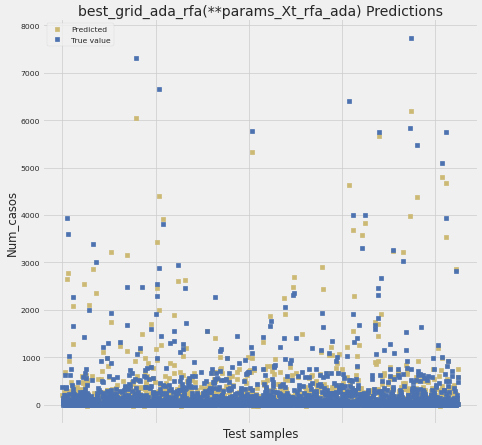

In [74]:
lista = [i for i in range(0,y_test.values.shape[0])]
xx = np.stack(lista)
plt.figure(figsize=(10,10))
plt.plot(xx, pred, "ys" ,label="Predicted")
plt.plot(xx, y_test, "bs" ,label="True value")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Num_casos")
plt.xlabel("Test samples")
plt.legend(loc="best")
plt.title("best_grid_ada_rfa(**params_Xt_rfa_ada) Predictions")
plt.show()

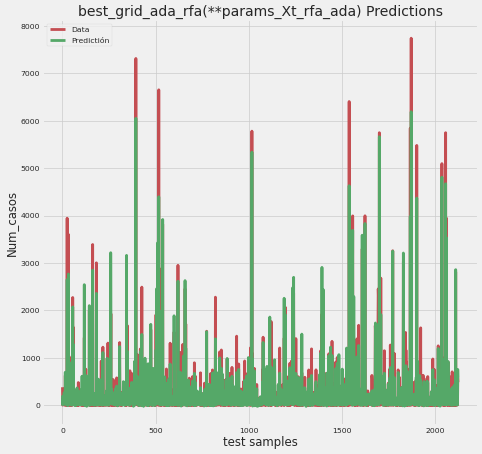

In [75]:
plt.figure(figsize=(10,10))
plt.plot(xx, y_test, c='r', label='Data')
#plt.plot(xx, y, c='k', label='data')
plt.ylabel("Num_casos")
plt.xlabel("test samples")
plt.plot(xx, pred, c='g', label='Predictión')
plt.axis('tight')
plt.legend()
plt.title("best_grid_ada_rfa(**params_Xt_rfa_ada) Predictions" )

plt.show()

In [76]:
#best_grid_ada_rfa.get_params()

## Features  Interpretation 

Explainability :SHAP (SHapley Additive exPlanations)to understand what input features drive the prediction result.

In [76]:
import shap
shap.initjs()

In [1]:
print("Dimension :", Xt_selK_ada.shape)
print("Cols :", Xt_rfa_ada.index)
atributos_selK_ada =[lista_variables[int(x)] for x in lista_Xt_kb_ada]
atributos_selK_ada

NameError: name 'Xt_selK_ada' is not defined

In [84]:
X_rfa_ada = pd.DataFrame(data=Xt_rfa_ada, columns = atributos_selK_ada)

In [85]:
shap_values = shap.TreeExplainer(modelo_final).shap_values(X_test)
#explainer = shap.TreeExplainer(modelo_final, X_test).shap_values(X_test)
#shap_values = explainer(X_test)
shap_interaction_values = shap.TreeExplainer(modelo_final).shap_interaction_values(X_test)

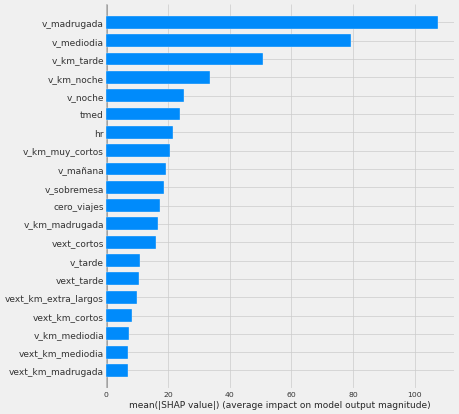

In [82]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [83]:
#shap.plots.bar(shap_values)

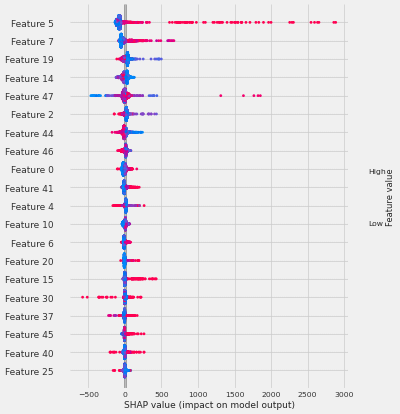

In [86]:
shap.summary_plot(shap_values, X_test)

In [85]:
# shap.summary_plot(shap_values[:2000,:], X_test.iloc[:2000,:])

**Diferente? **

In [86]:
explainer = shap.TreeExplainer(modelo_final, X_test)
shap_values = explainer(X_test)

 96%|=================== | 2031/2124 [00:18<00:00]       

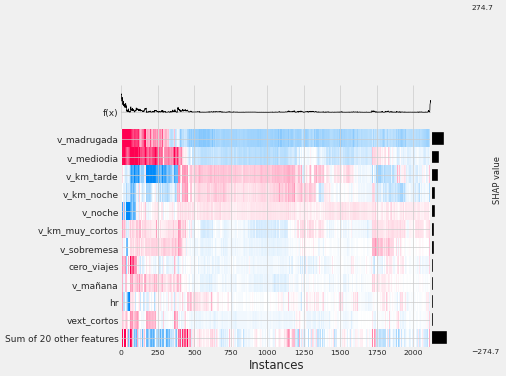

In [87]:
shap.plots.heatmap(shap_values, max_display=12)

32it [00:11,  2.78s/it]                                                                                                                                                   


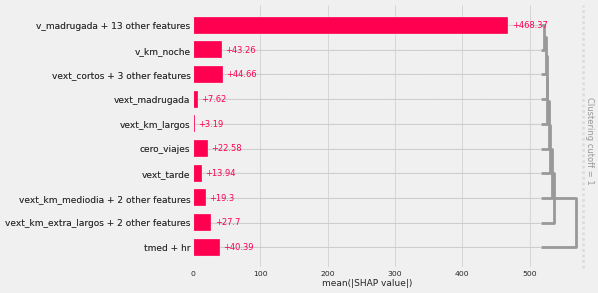

In [88]:
clust = shap.utils.hclust(Xt_rfa_ada, labels, linkage="single")
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

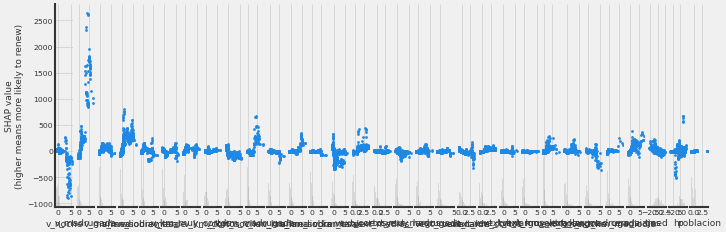

In [89]:
shap.plots.scatter(shap_values, dot_size=2, x_jitter=0.5, color=shap_values,
ylabel="SHAP value\n(higher means more likely to renew)")

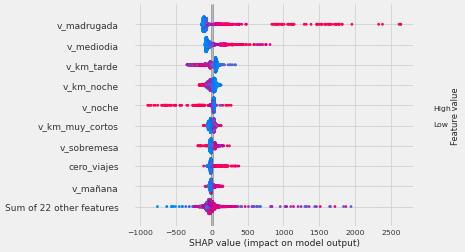

In [90]:
shap.plots.beeswarm(shap_values)

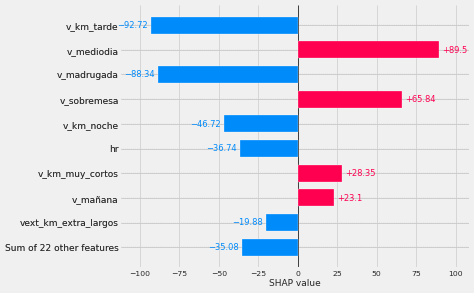

In [91]:
shap.plots.bar(shap_values[23])

In [87]:
shap.dependence_plot(hr, shap_values, X_test)

NameError: name 'hr' is not defined